In [38]:
%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

from ch2.vector_drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Drawing dino vectors

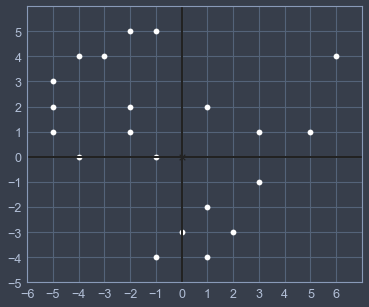

In [31]:

dino_vectors = [ (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1) ]
draw(Points(*dino_vectors))


## Connecting the points using hacky way

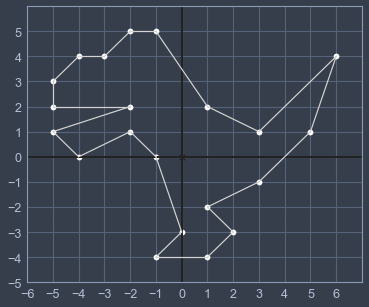

In [32]:
segments = []
for i in range(len(dino_vectors)):
    curr = dino_vectors[i]
    prev = dino_vectors[i - 1]
    segments.append( Segment(curr, prev) )

draw(
    Points(*dino_vectors),
    *segments
)

## Exercise 2.2
Draw the point in the plane and the arrow corresponding to the point (2, -2).

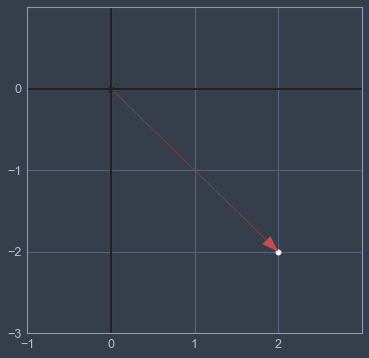

In [37]:
point = (2, -2)
draw(
    Points(point),
    Arrow(point, (0, 0))
)

## Exercise 2.2
Draw the dinosaur with the dots connected by constructing a Polygon object with the dino_vectors
as its vertices.

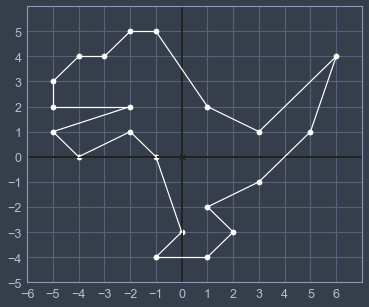

In [39]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**Exercise 2.5**: Draw the vectors (x,x**2) for x in the range from x = -10 to x = 11) as points (dots) using the draw
function. What is the result?

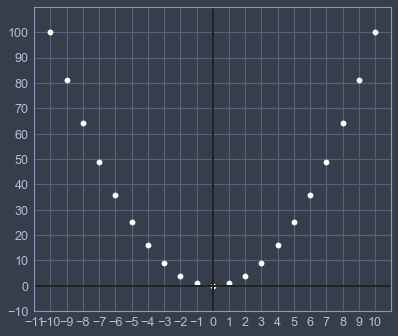

In [40]:
points = [(x, x ** 2)  for x in range(-10, 11)]
draw(Points(*points), grid= (1, 10), nice_aspect_ratio=False)